In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df_seville_2018 = pd.read_csv('data/clean_seville_2018.csv')
df_seville_2022 = pd.read_csv('data/clean_seville_2022.csv')

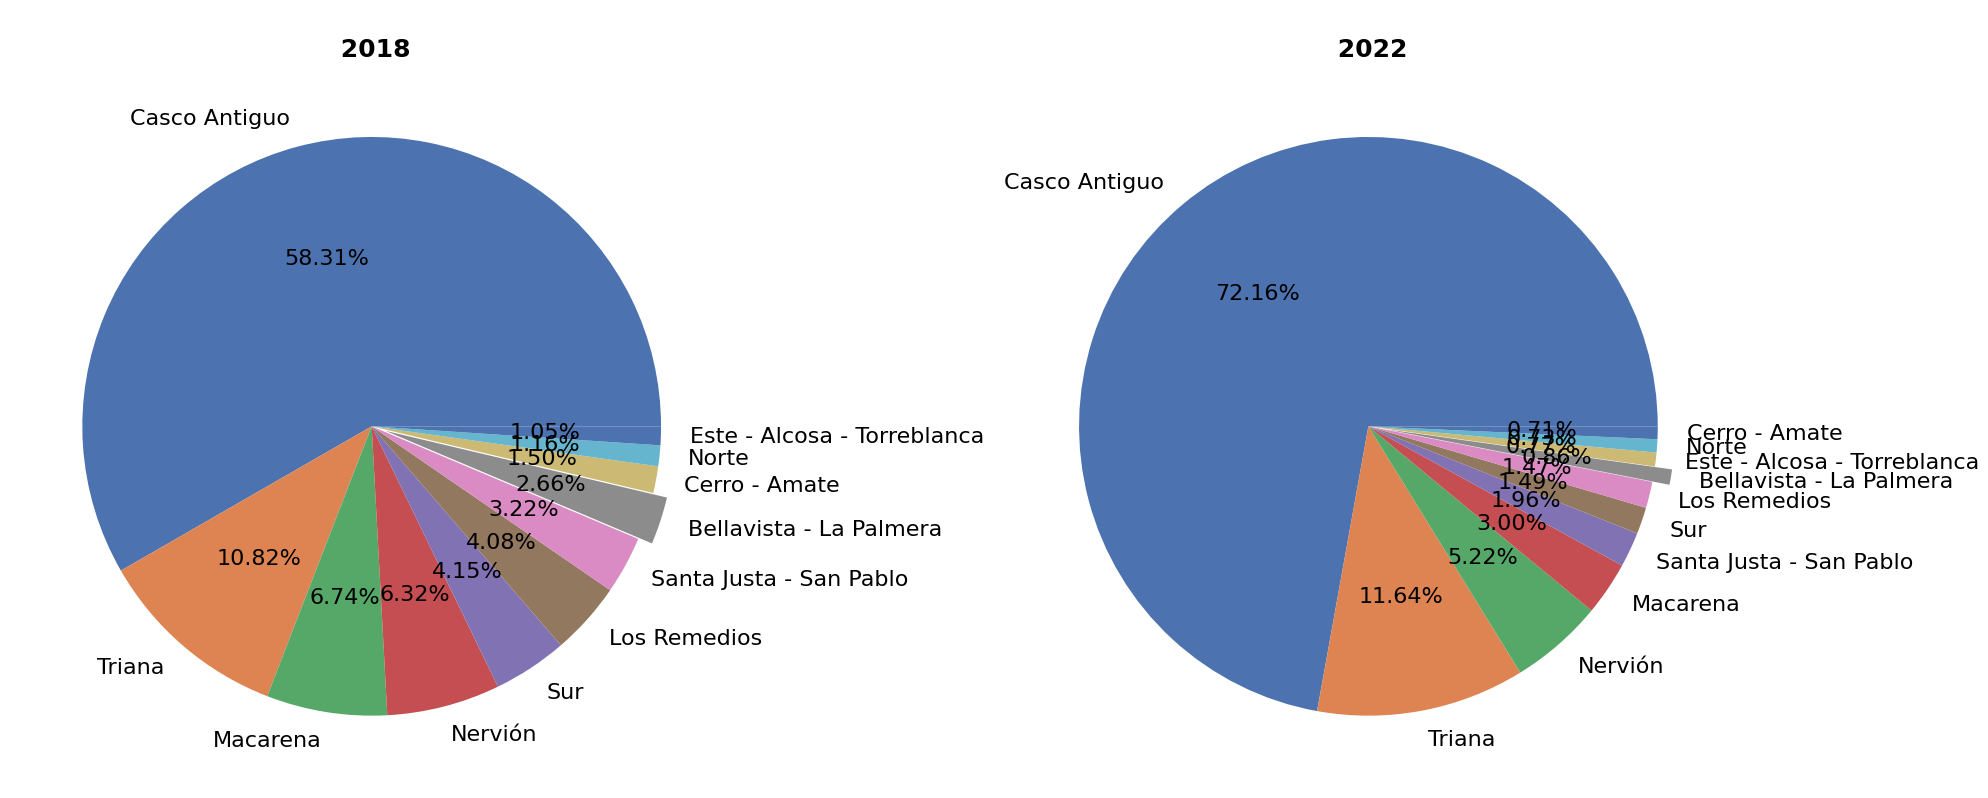

In [7]:
density_data_seville_2018 = df_seville_2018['Distrito'].value_counts()
density_data_seville_2022 = df_seville_2022['Distrito'].value_counts()


fig, ax = plt.subplots(1,2)
fig.set_size_inches((20,10))
ax[0].pie(x = density_data_seville_2018.values,
          labels = ['Casco Antiguo', 'Triana', 'Macarena', 'Nervión', 'Sur', 'Los Remedios', 'Santa Justa - San Pablo', 
                    'Bellavista - La Palmera', 'Cerro - Amate', 'Norte', 'Este - Alcosa - Torreblanca'],
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('deep'),
          explode= np.array([0]*7 + [0.05] + [0]*3))
ax[1].pie(x = density_data_seville_2022.values,
          labels = ['Casco Antiguo', 'Triana', 'Nervión','Macarena', 'Santa Justa - San Pablo', 'Sur', 'Los Remedios', 
                    'Bellavista - La Palmera', 'Este - Alcosa - Torreblanca', 'Norte', 'Cerro - Amate'],
          autopct='%1.2f%%',
          textprops={'fontsize' : 16},
          colors= sns.color_palette('deep'),
          explode= np.array([0]*7 + [0.06] + [0]*3))
ax[0].set_title('\n 2018',
                fontsize = 18,
                fontweight = 'bold')
ax[1].set_title('\n 2022',
                fontsize = 18,
                fontweight = 'bold')

fig.tight_layout()


In [30]:
df_coincidences = pd.merge(df_seville_2018, df_seville_2022, on = 'Key', how = 'inner')
df_coincidences.drop([11,31,61,73,74,81,102,138,151,187,224,241,311], axis = 0, inplace = True )
df_coincidences.drop(columns = ['Fecha_Encuentro','Camas','Baños','Barrio_x','Barrio_y',
                                'Precio/Capacidad_x','Precio/Capacidad_y', 'Min_Nights_x', 
                                'Min_Nights_y','Anuncios_Totales_del_Host','Host_Key_x',
                                'Host_Key_y','Distrito_y','Tipo_Inmueble_y','Dormitorios_x',
                                'Dormitorios_y'], inplace = True)
df_coincidences.rename(columns={'Tipo_Inmueble_x':'Tipo_Inmueble',
                                'Distrito_x':'Distrito'}, inplace = True)
df_coincidences = df_coincidences.reindex(columns=['Key','Precio_x','Precio_y',
                                                   'Distrito','Tipo_Inmueble','Capacidad_x','Capacidad_y'])

Variación porcentual del precio del alquiler turístico en Sevilla

In [50]:
df_coincidences['Variacion_Relativa'] = (df_coincidences['Precio_y'] - df_coincidences['Precio_x'])/df_coincidences['Precio_x']

gb_ti_coincidences = df_coincidences.groupby(by = 'Tipo_Inmueble')
var_quantile_003 = gb_ti_coincidences['Variacion_Relativa'].quantile(0.03)
var_quantile_097 = gb_ti_coincidences['Variacion_Relativa'].quantile(0.97)
df_coincidences['In_Quantiles_Margin'] = df_coincidences.apply(lambda row : 
                                                       (row.Variacion_Relativa >= var_quantile_003[row.Tipo_Inmueble]) &
                                                       (row.Variacion_Relativa <= var_quantile_097[row.Tipo_Inmueble]), axis =1)

df_coincidences_truncated = df_coincidences[df_coincidences['In_Quantiles_Margin'] == True].drop(columns={'In_Quantiles_Margin'})

In [54]:
df_coincidences_truncated['Variacion_Relativa'].describe()

count    282.000000
mean       0.237491
std        0.336021
min       -0.294416
25%       -0.011836
50%        0.166667
75%        0.440731
max        1.265823
Name: Variacion_Relativa, dtype: float64